# Data Mining Lab5 - Support Vector Machines (SVMs) and Sampling by Keon on June 15th
#### Data Mining Summer 2021, UVic

### Part 1: Introduction to SVMs (Credit: https://www.kaggle.com/azzion/svm-for-beginners-tutorial/notebook)

This notebook essentially covers a basic tutorial for Support Vector Machine. I am going to use the mobile prediction data for this excerise. 

The below topics are covered in this Kernal. 
- Data prepocessing 
- Target value Analysis (EDA)
- SVM
- Linear SVM
- SV Regressor
- Non Linear SVM with kernal - RBF ( note: you can also try poly )
- Non Linear SVR


#### Dataset (Mobile price classification): https://www.kaggle.com/iabhishekofficial/mobile-price-classification

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


import os

**DATA PREPROCESSING**

In [ ]:
df = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
# checking if there is any missing value 
print(df.isnull().sum().max())
df.columns

0


Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

Finding missing values (https://towardsdatascience.com/how-to-check-for-missing-values-in-pandas-d2749e45a345)
**TARGET VALUE ANALYSIS**

In [ ]:
#understanding the predicted value - which is hot encoded, in real life price won't be hot encoded.
df['price_range'].describe(), df['price_range'].unique()

# there are 4 classes in the predicted value

(count    2000.000000
 mean        1.500000
 std         1.118314
 min         0.000000
 25%         0.750000
 50%         1.500000
 75%         2.250000
 max         3.000000
 Name: price_range, dtype: float64,
 array([1, 2, 3, 0]))

<AxesSubplot:>

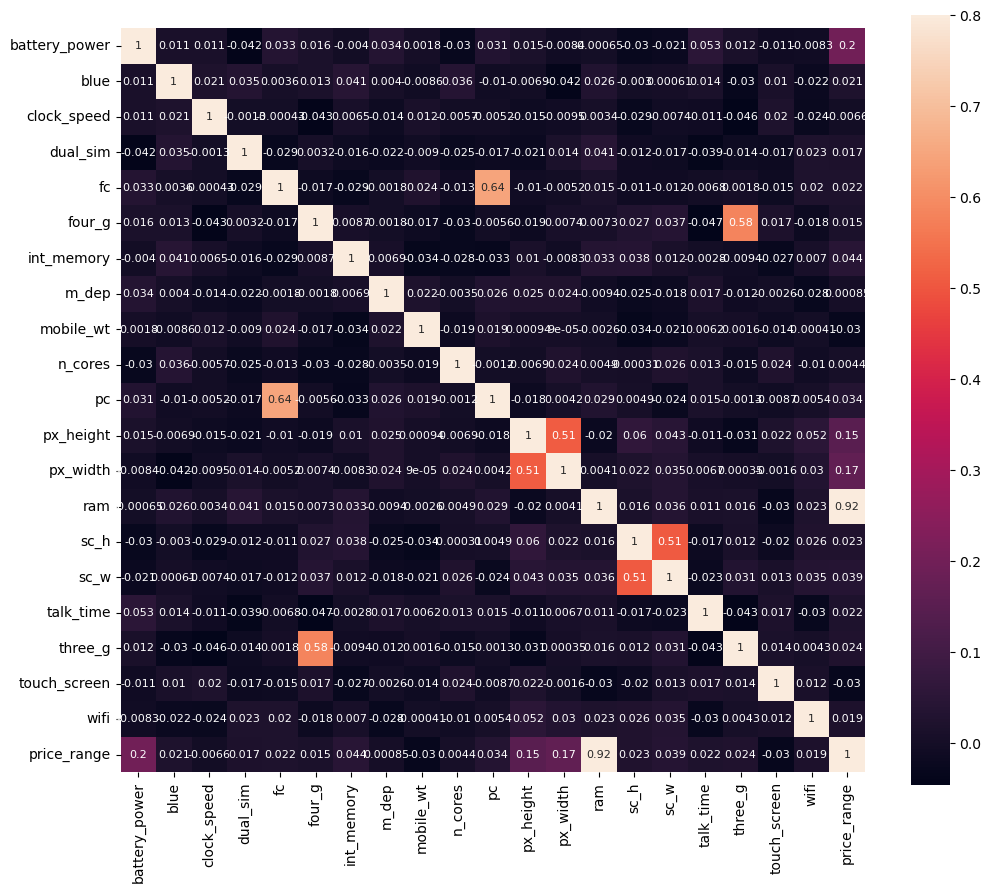

In [ ]:
corrmat = df.corr()
f,ax = plt.subplots(figsize=(12,10))
sns.heatmap(corrmat,vmax=0.8,square=True,annot=True,annot_kws={'size':8})

Now in the data set there is no need to create dummy variables or handle missing data as data set doesn't have any missing data 

**SUPPORT VECTOR MACHINES AND METHODS : **

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

y_t = np.array(df['price_range'])
X_t = df
X_t = df.drop(['price_range'],axis=1)
X_t = np.array(X_t)

print("shape of Y :"+str(y_t.shape))
print("shape of X :"+str(X_t.shape))

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_t = scaler.fit_transform(X_t)

shape of Y :(2000,)
shape of X :(2000, 20)


In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X_t,y_t,test_size=.20,random_state=42)
print("shape of X Train :"+str(X_train.shape))
print("shape of X Test :"+str(X_test.shape))
print("shape of Y Train :"+str(Y_train.shape))
print("shape of Y Test :"+str(Y_test.shape))

shape of X Train :(1600, 20)
shape of X Test :(400, 20)
shape of Y Train :(1600,)
shape of Y Test :(400,)


In [ ]:
for this_C in [1,3,5,10,40,60,80,100]:
    clf = SVC(kernel='linear',C=this_C).fit(X_train,Y_train)
    scoretrain = clf.score(X_train,Y_train)
    scoretest  = clf.score(X_test,Y_test)
    print("Linear SVM value of C:{}, training score :{:2f} , Test Score: {:2f} \n".format(this_C,scoretrain,scoretest))

Linear SVM value of C:1, training score :0.953750 , Test Score: 0.960000 

Linear SVM value of C:3, training score :0.961875 , Test Score: 0.977500 

Linear SVM value of C:5, training score :0.968125 , Test Score: 0.975000 

Linear SVM value of C:10, training score :0.977500 , Test Score: 0.967500 

Linear SVM value of C:40, training score :0.981250 , Test Score: 0.962500 

Linear SVM value of C:60, training score :0.981250 , Test Score: 0.962500 

Linear SVM value of C:80, training score :0.981875 , Test Score: 0.970000 

Linear SVM value of C:100, training score :0.980625 , Test Score: 0.967500 



In [ ]:
from sklearn.model_selection import cross_val_score,StratifiedKFold
clf1 = SVC(kernel='linear',C=20).fit(X_train,Y_train)
scores = cross_val_score(clf1,X_train,Y_train,cv=5)
strat_scores = cross_val_score(clf1,X_train,Y_train,cv=StratifiedKFold(5,random_state=10,shuffle=True))

print("The Cross Validation Score :"+str(scores))
print("The Average Cross Validation Score :"+str(scores.mean()))
print("The Stratified Cross Validation Score :"+str(strat_scores))
print("The Average Stratified Cross Validation Score :"+str(strat_scores.mean()))

The Cross Validation Score :[0.95     0.9625   0.95     0.925    0.971875]
The Average Cross Validation Score :0.9518749999999999
The Stratified Cross Validation Score :[0.95625  0.95     0.94375  0.971875 0.94375 ]
The Average Stratified Cross Validation Score :0.953125


In [ ]:
from sklearn.dummy import DummyClassifier

for strat in ['stratified', 'most_frequent', 'prior', 'uniform']:
    dummy_maj = DummyClassifier(strategy=strat).fit(X_train,Y_train)
    print("Train Stratergy :{} \n Score :{:.2f}".format(strat,dummy_maj.score(X_train,Y_train)))
    print("Test Stratergy :{} \n Score :{:.2f}".format(strat,dummy_maj.score(X_test,Y_test)))

Train Stratergy :stratified 
 Score :0.25
Test Stratergy :stratified 
 Score :0.25
Train Stratergy :most_frequent 
 Score :0.26
Test Stratergy :most_frequent 
 Score :0.23
Train Stratergy :prior 
 Score :0.26
Test Stratergy :prior 
 Score :0.23
Train Stratergy :uniform 
 Score :0.25
Test Stratergy :uniform 
 Score :0.20


In [ ]:
# plotting the decision boundries for the data 
#converting the data to array for plotting. 
X = np.array(df.iloc[:,[0,13]])
y = np.array(df['price_range'])
print("Shape of X:"+str(X.shape))
print("Shape of y:"+str(y.shape))
X = scaler.fit_transform(X)

Shape of X:(2000, 2)
Shape of y:(2000,)


In [ ]:
# customize color maps
cm_dark = ListedColormap(['#ff6060', '#8282ff','#ffaa00','#fff244','#4df9b9','#76e8fc','#3ad628'])
cm_bright = ListedColormap(['#ffafaf', '#c6c6ff','#ffaa00','#ffe2a8','#bfffe7','#c9f7ff','#9eff93'])

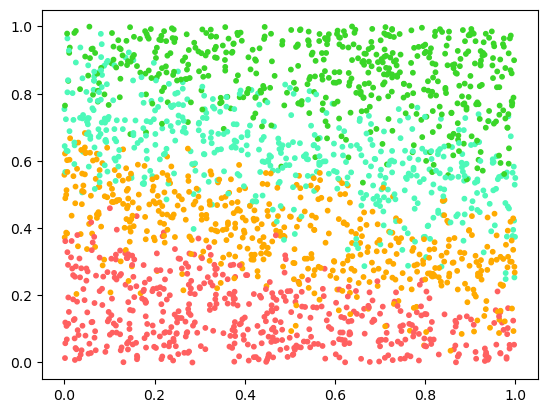

In [ ]:
plt.scatter(X[:,0],X[:,1],c=y,cmap=cm_dark,s=10,label=y)
plt.show()

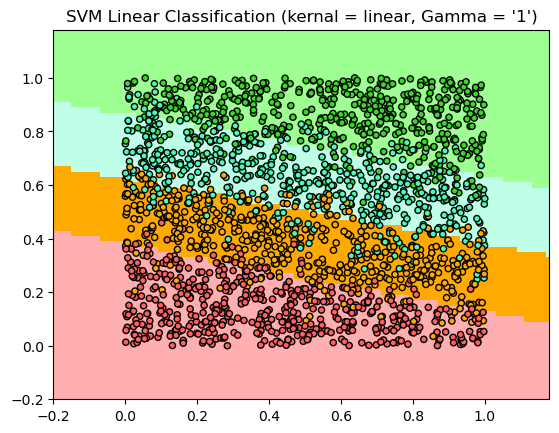

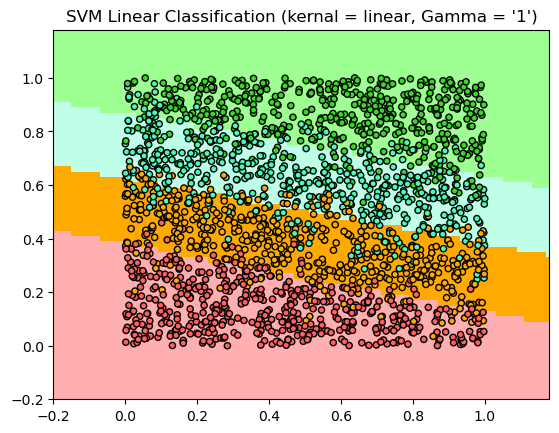

In [ ]:
h = .02  # step size in the mesh
C_param = 1 # No of neighbours
for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf1 = SVC(kernel='linear',C=C_param)
    clf1.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min()-.20, X[:, 0].max()+.20
    y_min, y_max = X[:, 1].min()-.20, X[:, 1].max()+.20
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf1.predict(np.c_[xx.ravel(), yy.ravel()])   # ravel to flatten the into 1D and c_ to concatenate 

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cm_bright)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_dark,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("SVM Linear Classification (kernal = linear, Gamma = '%s')"% (C_param))

plt.show()

In [ ]:
print("The score of the above :"+str(clf1.score(X,y)))

The score of the above :0.825


In [ ]:
# Linear Support vector machine with only C Parameter 
from sklearn.svm import LinearSVC

for this_C in [1e-5, 1e-3, 1e-1, 1,3,5,10]:
    clf2 = LinearSVC(C=this_C, max_iter=2000).fit(X_train,Y_train)
    scoretrain = clf2.score(X_train,Y_train)
    scoretest  = clf2.score(X_test,Y_test)
    print("Linear SVM value of C:{}, training score :{:2f} , Test Score: {:2f} \n".format(this_C,scoretrain,scoretest))

Linear SVM value of C:1e-05, training score :0.392500 , Test Score: 0.392500 

Linear SVM value of C:0.001, training score :0.645625 , Test Score: 0.675000 

Linear SVM value of C:0.1, training score :0.776250 , Test Score: 0.790000 

Linear SVM value of C:1, training score :0.846250 , Test Score: 0.840000 

Linear SVM value of C:3, training score :0.864375 , Test Score: 0.855000 

Linear SVM value of C:5, training score :0.867500 , Test Score: 0.870000 

Linear SVM value of C:10, training score :0.874375 , Test Score: 0.875000 



/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Apparently we got better scores with SVC where we defined the kernal as linear than with just LinearSVC

The LinearSVC class is based on the liblinear library, which implements an optimized algorithm for linear SVMs.
1. It does not support the kernel trick, but it scales almost linearly with the number of training instances and the number of features: its training time complexity is roughly O(m × n).

The SVC class is based on the libsvm library, which implements an algorithm that supports the kernel trick.
1. The training time complexity is usually between O(m2 × n) and O(m3 × n). 
1. LinearSVC is much faster than SVC(kernel="linear")


Differences between LinearSVC and SVC(kernel="linear") -> https://stackoverflow.com/questions/34811770/linearsvc-differs-from-svckernel-linear


In [ ]:
from sklearn.svm import SVR

svr = SVR(kernel='linear',C=1,epsilon=.01).fit(X_train,Y_train)
print("{:.2f} is the accuracy of the SV Regressor".format(svr.score(X_train,Y_train)))

0.92 is the accuracy of the SV Regressor


* SVM supports linear and nonlinear regression.
* SVM Regression tries to fit as many instances as possible on the decision boundary while limiting margin violations.
* The width of the decision boundary is controlled by a hyperparameter ϵ. 


**NON LINEAR SVM **

A method to Handle Non linear relationships in our data set is to use polynomial Kernal or using a similarity function with our SVM.

We will use the Gaussian Radial Basis Function (RBF) for the same to handle this in Sklearn. There is a Gamma hyperparameter. 
Check the Gausian RBF Function - for more info. 

Technically, the gamma parameter is the inverse of the standard deviation of the RBF kernel (Gaussian function), which is used as similarity measure between two points. Intuitively, a small gamma value define a Gaussian function with a large variance. In this case, two points can be considered similar even if are far from each other. **On the other hand, a large gamma value means define a Gaussian function with a small variance and in this case, two points are considered similar just if they are close to each other.**

Initution : we create different landmarks and then check how far the training examples are from the landmark. In practise, if we have n training examples then we will have n landmarks and we will thus create a feature set of n values with n landmarks. When the training example is closest to a landmark the value the variance will be small and when far the value will be large and hence we will associate the close to the landmark example with a 1 and those that are far with a 0. This ability makes the SVM very powerful. 

In [ ]:
# SVM with RBF KERNAL AND ONLY C PARAMETER 

for this_C in [1,5,10,25,50,100]:
    clf3 = SVC(kernel='rbf',C=this_C).fit(X_train,Y_train)
    clf3train = clf3.score(X_train,Y_train)
    clf3test  = clf3.score(X_test,Y_test)
    print("SVM for Non Linear \n C:{} Training Score : {:2f} Test Score : {:2f}\n".format(this_C,clf3train,clf3test))

SVM for Non Linear 
 C:1 Training Score : 0.969375 Test Score : 0.862500

SVM for Non Linear 
 C:5 Training Score : 0.998750 Test Score : 0.872500

SVM for Non Linear 
 C:10 Training Score : 1.000000 Test Score : 0.877500

SVM for Non Linear 
 C:25 Training Score : 1.000000 Test Score : 0.877500

SVM for Non Linear 
 C:50 Training Score : 1.000000 Test Score : 0.877500

SVM for Non Linear 
 C:100 Training Score : 1.000000 Test Score : 0.877500



In [ ]:
# SVM WITH RBF KERNAL, C AND GAMMA HYPERPARAMTER 
for this_gamma in [.1,.5,.10,.25,.50,1]:
    for this_C in [1,5,7,10,15,25,50]:
        clf3 = SVC(kernel='rbf',C=this_C,gamma=this_gamma).fit(X_train,Y_train)
        clf3train = clf3.score(X_train,Y_train)
        clf3test  = clf3.score(X_test,Y_test)
        print("SVM for Non Linear \n Gamma: {} C:{} Training Score : {:2f} Test Score : {:2f}\n".format(this_gamma,this_C,clf3train,clf3test))

SVM for Non Linear 
 Gamma: 0.1 C:1 Training Score : 0.928750 Test Score : 0.902500

SVM for Non Linear 
 Gamma: 0.1 C:5 Training Score : 0.965000 Test Score : 0.907500

SVM for Non Linear 
 Gamma: 0.1 C:7 Training Score : 0.971250 Test Score : 0.912500

SVM for Non Linear 
 Gamma: 0.1 C:10 Training Score : 0.979375 Test Score : 0.907500

SVM for Non Linear 
 Gamma: 0.1 C:15 Training Score : 0.986875 Test Score : 0.905000

SVM for Non Linear 
 Gamma: 0.1 C:25 Training Score : 0.991250 Test Score : 0.920000

SVM for Non Linear 
 Gamma: 0.1 C:50 Training Score : 0.998125 Test Score : 0.910000

SVM for Non Linear 
 Gamma: 0.5 C:1 Training Score : 0.980625 Test Score : 0.835000

SVM for Non Linear 
 Gamma: 0.5 C:5 Training Score : 1.000000 Test Score : 0.850000

SVM for Non Linear 
 Gamma: 0.5 C:7 Training Score : 1.000000 Test Score : 0.847500

SVM for Non Linear 
 Gamma: 0.5 C:10 Training Score : 1.000000 Test Score : 0.847500

SVM for Non Linear 
 Gamma: 0.5 C:15 Training Score : 1.0000

In [ ]:
# grid search method 
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [1,5,7,10,15,25,50],
              'gamma': [.1,.5,.10,.25,.50,1]}
GS = GridSearchCV(SVC(kernel='rbf'),param_grid,cv=5)

In [ ]:
GS.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 5, 7, 10, 15, 25, 50],
                         'gamma': [0.1, 0.5, 0.1, 0.25, 0.5, 1]})

In [ ]:
print("the parameters {} are the best.".format(GS.best_params_))
print("the best score is {:.2f}.".format(GS.best_score_))

the parameters {'C': 7, 'gamma': 0.1} are the best.
the best score is 0.90.


In [ ]:
# Kernalized SVM machine 
svr2 = SVR(degree=2,C=100,epsilon=.01).fit(X_train,Y_train)
print("{:.2f} is the accuracy of the SV Regressor".format(svr2.score(X_train,Y_train)))

1.00 is the accuracy of the SV Regressor


We can notice that the kernalised Support vector machine regressor gives better accuracy than the previous Linear Regressor(non kernal) SVM. Never the less one, needs to understand the data one is work on before trying out various methods. Cross validation techniques are useful.

We have predicted the value of the test set that was provided to us in the data set and we can from the previous 2 blocks that our predictions are pretty accurate. Looks Good!

# Part2: Introduction to Sampling
### numpy.random()


In [ ]:
# Import library
import numpy as np
import matplotlib.pyplot as plt

### Sampling from a Unifrom distirbution [0,1)

In [ ]:
np.random.sample()

0.32775718599821346

Uniform sampling between [l,h) interval

In [ ]:
l = 3
h = 7
(h-l) * np.random.sample() + l

4.4256813249496965

Sampling multiple points

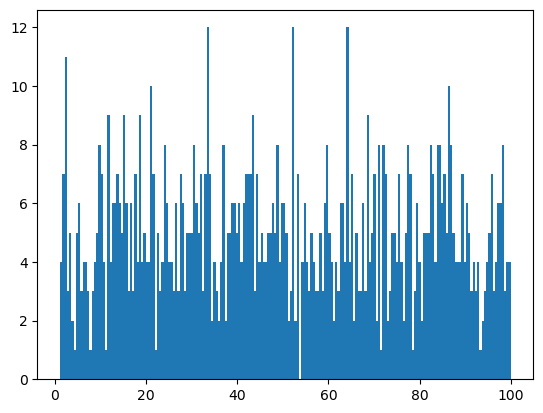

In [ ]:
n = 1000
l = 1
h = 100
samples = (h-l) * np.random.sample(n) + l
plt.hist(samples,bins = 200)
plt.show()

Alternatively, you can call np.random.rand() function

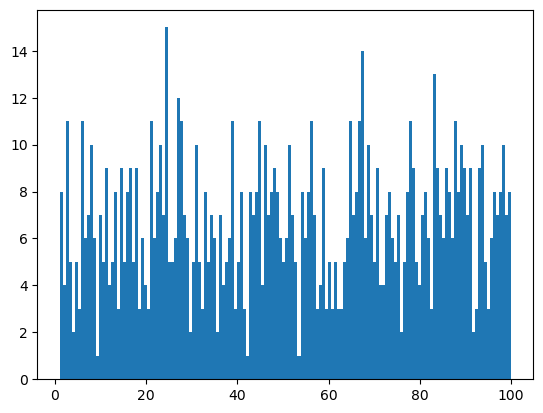

In [ ]:
h =100
l = 1
samples = (h-l) * np.random.rand(1000) + l
plt.hist(samples,bins=150)
plt.show()

### Sampling from well-known distributions
#### Normal Distrubtion: numpy.random.normal(loc=0.0, scale=1.0, size=None) loc = mean, scale = standard deviation
#### https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html

<AxesSubplot:ylabel='Density'>

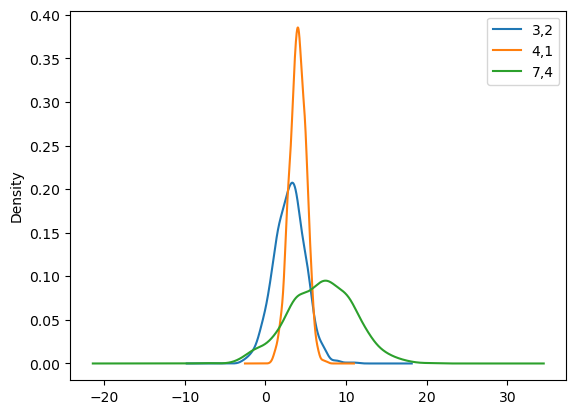

In [ ]:
import pandas as pd
n = 1000
samples = np.random.randn(n,1)
samples1 = np.random.normal(3,2,1000)
samples2 = np.random.normal(4,1,1000)
samples3 = np.random.normal(7,4,1000)
df = pd.DataFrame({'3,2':samples1 , '4,1':samples2 , '7,4':samples3})
df.plot.density()

### Sampling Beta Distribution
### np.random.beta(a, b, size=None)
#### https://numpy.org/doc/stable/reference/random/generated/numpy.random.beta.html
$$f(x;\alpha,\beta) = \frac{1}{B(\alpha,\beta)}x^{\alpha - 1}(1-x) ^{\beta -1}$$
Where the normalization $B$ is the Beta function:
$$B(\alpha, \beta) = \int_{0}^{1} t^{\alpha-1}(1-t)^{\beta - 1}dt$$.


<AxesSubplot:ylabel='Density'>

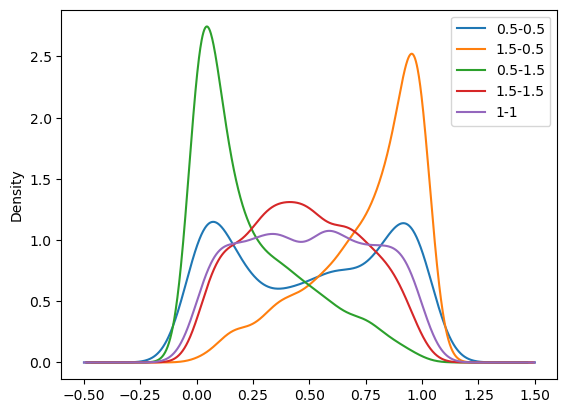

In [ ]:
betaSamples1 = np.random.beta(0.5,0.5,1000)
betaSamples2 = np.random.beta(1.5,0.5,1000)
betaSamples3 = np.random.beta(0.5,1.5,1000)
betaSamples4 = np.random.beta(1.5,1.5,1000)
betaSamples5 = np.random.beta(1,1,1000)

dfBeta = pd.DataFrame({'0.5-0.5':betaSamples1, '1.5-0.5':betaSamples2 
                       , '0.5-1.5': betaSamples3 , '1.5-1.5': betaSamples4, '1-1': betaSamples5 })
dfBeta.plot.density()

## Sampling Binomial Distribution
### numpy.random.binomial(n, p, size=None)
#### https://numpy.org/doc/stable/reference/random/generated/numpy.random.binomial.html
$$P(N) = {n \choose N} p^N (1-p)^{n-N}$$

<AxesSubplot:ylabel='Frequency'>

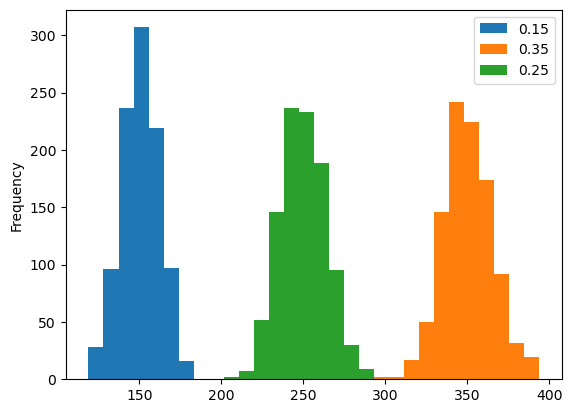

In [ ]:
n = 1000
binomSample1 = np.random.binomial(n,0.15,1000)
binomSample2 = np.random.binomial(n,0.35,1000)
binomSample3 = np.random.binomial(n,0.25,1000)
dfBinom = pd.DataFrame({'0.15': binomSample1 , '0.35': binomSample2 ,'0.25':binomSample3})
# dfBinom.plot.density()
dfBinom.plot.hist(bins = 30)

## Others
### Dirichlet, chisquare, exponential, gamma, geometric, ... by using numpy.random.chisquare  etc
#### https://numpy.org/doc/stable/reference/random/generated/numpy.random.chisquare.html


## Sampling from Discrete Collections
### numpy.random.randint(low, high=None, size=None)
#### https://numpy.org/doc/stable/reference/random/generated/numpy.random.randint.html

In [ ]:
low = 3
high = 11
samples = np.random.randint(low,high,(10,2))
print(samples.shape)
print(samples)

(10, 2)
[[ 6 10]
 [ 3  7]
 [ 9  8]
 [ 8  6]
 [ 4  9]
 [ 4  3]
 [ 4  7]
 [ 7  4]
 [ 7  8]
 [10  8]]


We can also sample from a discrete set by using <b>numpy.random.choice()</b>
#### https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html

In [ ]:
# Generate a list of integers from 1 to 99:
iList = np.arange(1,100,1)   # start, stop, step
k = 20
np.random.choice(iList, size=k,replace=False) 

array([93, 62,  3, 66, 34, 20, 68,  7, 41,  2,  8, 35, 24, 30, 80, 79, 63,
       48, 86, 59])

### Sampling over non-unifrom distribution
#### https://numpy.org/doc/stable/reference/generated/numpy.unique.html

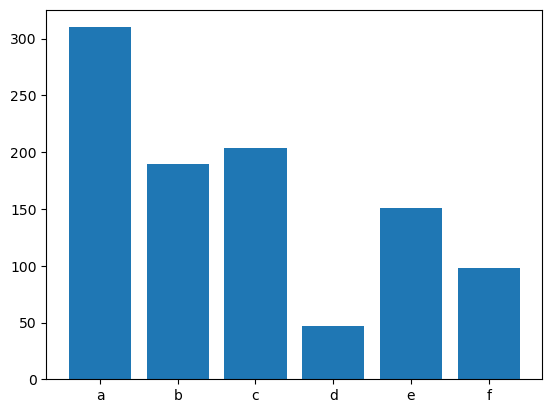

In [ ]:
p = [0.3, 0.2, 0.2, 0.05, 0.15, 0.1]   # probability must sum to 1.
k = 1000
cList = ['a', 'b', 'c', 'd', 'e', 'f']
cSamp = np.random.choice(cList, size=k, p=p) 
label, counts = np.unique(cSamp, return_counts=True)
plt.bar(label, counts)
plt.show()

### Random Variables
Let's use a dice game for illustration.
Roll two dice, take the sum.

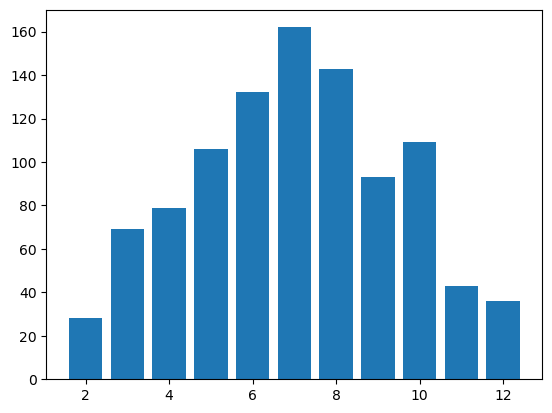

In [ ]:
dice = [1,2,3,4,5,6]
k = 1000
roll1 = np.random.choice(dice, size=k)
roll2 = np.random.choice(dice, size=k)
sumD = roll1 + roll2
label, counts = np.unique(sumD, return_counts=True)
plt.bar(label, counts)
plt.show()

## Data Sampling

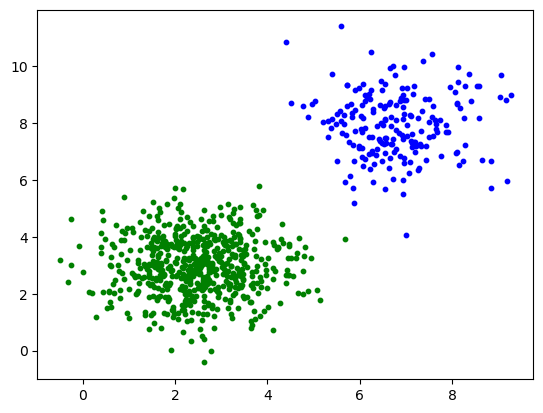

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import numpy as np
numSamples = [600,200]
samples,labels = make_blobs(n_samples=numSamples, 
                             centers=([2.5, 3], [6.7, 7.9]))

colours = ('green', 'blue')

fig, ax = plt.subplots()
for n_class in range(2):
    ax.scatter(samples[labels==n_class][:, 0], samples[labels==n_class][:, 1], 
               c=colours[n_class], s=10)

(40, 2)
(40,)
Data sampling: 30 green points (original:600) and 10 blue points (original:200)


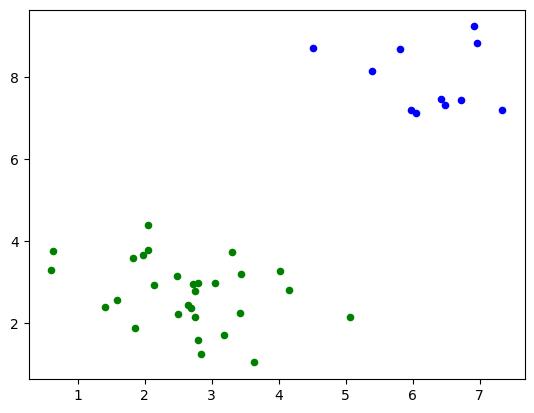

In [ ]:
idx = np.arange(len(samples))
s = np.random.choice(idx, size=int(len(samples)/20), replace=False)
sampledPts = samples[s]
sampledLables = np.array(labels[s])
print(sampledPts.shape)
print(sampledLables.shape)
print("Data sampling: 30 green points (original:600) and 10 blue points (original:200)")
colours = ('green', 'blue')
fig, ax = plt.subplots()
for n_class in range(2):
    ax.scatter(sampledPts[sampledLables==n_class][:, 0], sampledPts[sampledLables==n_class][:, 1]
               ,c=colours[n_class],s=20)